**Firstly we import the required modules needed in this project**

In [1]:
# importing required libraries
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the dataset**

In [2]:
# Load a comma separated file (CSV file) into a DataFrame:
births = pd.read_csv("births.csv")
print(births.head(10))

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548
5  1969      1  3.0      M    4994
6  1969      1  4.0      F    4440
7  1969      1  4.0      M    4520
8  1969      1  5.0      F    4192
9  1969      1  5.0      M    4198


In [3]:
print(births.tail())

       year  month  day gender  births
15542  2008     10  NaN      M  183219
15543  2008     11  NaN      F  158939
15544  2008     11  NaN      M  165468
15545  2008     12  NaN      F  173215
15546  2008     12  NaN      M  181235


**Printing the shape of dataset**

In [4]:
print(births.shape)

(15547, 5)


The dataset contains 15547 rows and 5 columns

**Information About the dataset**

In [5]:
print(births.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB
None


The info() method also tells us how many Non-Null values there are present in each column, and in our data set it seems like there are 15067 of 15546 Non-Null values in the "day" column.
i.e. Which means that there are 480 rows with no value at all, in the "day" column, for whatever reason.


**Visualizing the total number of births by year with original dataset**

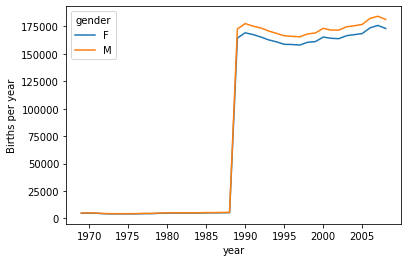

In [6]:
birth = births.pivot_table('births', index='year', columns='gender')
birth.plot()
plt.ylabel("Births per year")
plt.show()

The plot shows that there is drastic increase in no of births from year 1985 to 1990

**Visualizing the total number of births by month with original dataset:**

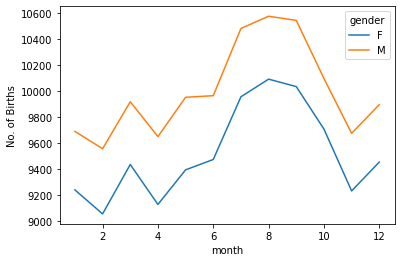

In [7]:
birth = births.pivot_table('births', index='month', columns='gender')
birth.plot()
plt.ylabel("No. of Births")
plt.show()

**Remove all rows with NULL values**

In [8]:
births.dropna(inplace = True)
births['day'] = births['day'].astype(int)

In [9]:
births.describe()

,year,month,day,births
count,15067.000000,15067.000000,15067.000000,15067.000000
mean,1978.417402,6.516427,17.769894,4678.631513
std,5.762018,3.449554,15.284034,1003.104707
min,1969.000000,1.000000,1.000000,1.000000
25%,1973.000000,4.000000,8.000000,4344.000000
50%,1978.000000,7.000000,16.000000,4785.000000
75%,1983.000000,10.000000,24.000000,5247.000000
max,1988.000000,12.000000,99.000000,6527.000000


**Computing percentile, mu, sigma** 

In [10]:
quartiles = np.percentile(births['births'], [25, 50, 75])
print("Quartiles are :" ,quartiles)
mu = quartiles[1]
print("Mu is : ",mu)
sigma = 0.74 * (quartiles[2] - quartiles[0])
print("Sigma is : ",sigma)

Quartiles are : [4344. 4785. 5247.]
Mu is :  4785.0
Sigma is :  668.22


This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution


**Removing Outliners :**

With this we can use the query() method to filter-out rows with births outside these values:

In [11]:
births = births.query('(births > @mu - 5 * @sigma) & (births < @mu + 5 * @sigma)')
births.describe()

,year,month,day,births
count,14610.000000,14610.000000,14610.000000,14610.000000
mean,1978.501027,6.522930,15.729637,4824.470089
std,5.766538,3.448821,8.800393,579.996983
min,1969.000000,1.000000,1.000000,3249.000000
25%,1974.000000,4.000000,8.000000,4383.000000
50%,1979.000000,7.000000,16.000000,4812.000000
75%,1984.000000,10.000000,23.000000,5259.000000
max,1988.000000,12.000000,31.000000,6527.000000


**Visual representation of the dataset when anomalies are removed.**

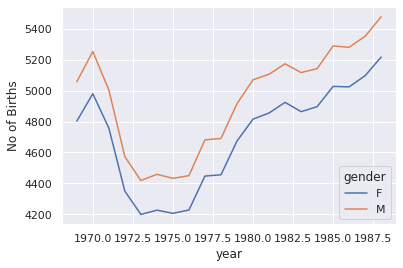

In [12]:
# creating graph showing distribution of no. of births with year
sns.set()
birth = births.pivot_table('births', index='year', columns='gender')
birth.plot()
plt.ylabel("No of Births")
plt.show()

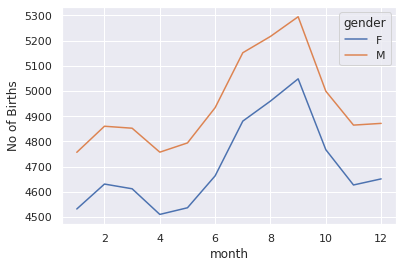

In [13]:
# creating graph showing distribution of no. of births with month
sns.set()
birth = births.pivot_table('births', index='month', columns='gender')
birth.plot()
plt.ylabel("No of Births")
plt.show()


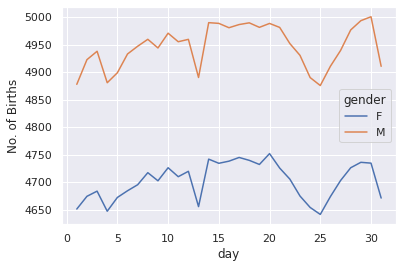

In [14]:
# creating graph showing distribution of no. of births with days
sns.set()
birth = births.pivot_table('births', index='day', columns='gender')
birth.plot()
plt.ylabel("No. of Births")
plt.show()


**Scatter Plot**

Text(0, 0.5, 'Number of births')

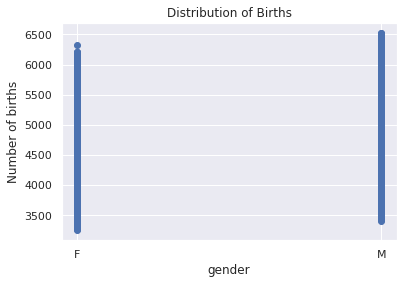

In [15]:
plt.scatter(births.gender,births.births)
plt.title("Distribution of Births")
plt.xlabel("gender")
plt.ylabel("Number of births")

**Correlation between features**

            year     month       day    births
year    1.000000 -0.000234  0.000268  0.345182
month  -0.000234  1.000000  0.010522  0.135702
day     0.000268  0.010522  1.000000  0.016718
births  0.345182  0.135702  0.016718  1.000000


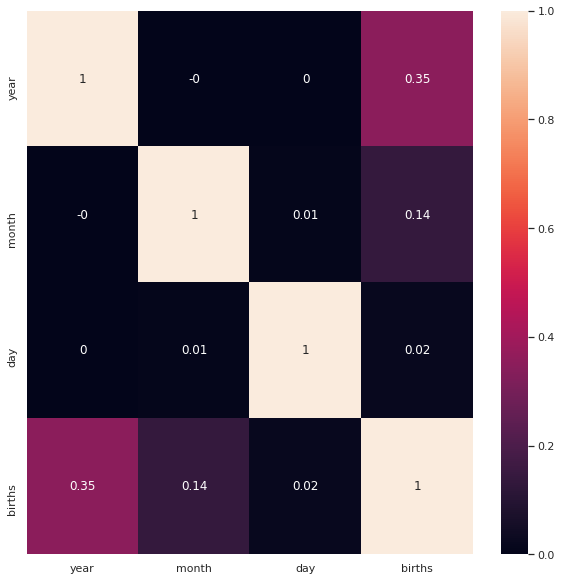

In [16]:
corr=births.corr()
print(corr)

plt.figure(figsize=(10,10))
sns.heatmap(data=round(births.corr(),2),annot=True)
plt.show()

This shows that there is high correlation b/w year and No. of births

**Births per decade**

Let's add a decade column, and take a look at male and female births as a function of decade:

In [17]:
births['decade'] = 10 * (births['year'] // 10)
birth_decade =births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(birth_decade)

gender         F         M
decade                    
1960     1752836   1845742
1970    16260348  17118785
1980    16336507  17171290


We immediately see that male births outnumber female births in every decade. To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year 

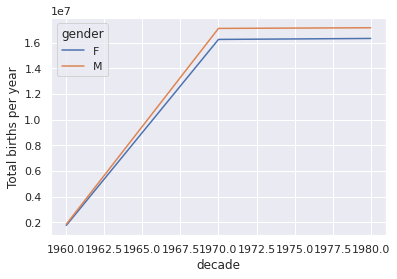

In [18]:
birth_decade.plot()
plt.ylabel("Total births per year")
plt.show()

**Births per Weekday**

In [19]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

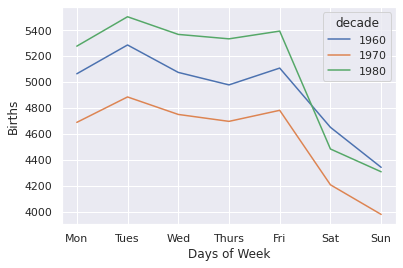

In [20]:
births_day = births.pivot_table('births', index='dayofweek',columns='decade', aggfunc='mean')
births_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
births_day.plot()
plt.xlabel("Days of Week")
plt.ylabel("Births")
plt.show()

**Births by the day of the month**

In [21]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
print(births_by_date.head())

print(births_by_date.tail())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
        births
12 27  4850.15
   28  5044.20
   29  5120.15
   30  5172.35
   31  4859.20


In [22]:
births_by_date.index = [pd.datetime(2000, month, day)for (month, day) in births_by_date.index]
print(births_by_date.head())
print(births_by_date.tail())

              births
2000-01-01  4009.225
2000-01-02  4247.400
2000-01-03  4500.900
2000-01-04  4571.350
2000-01-05  4603.625
             births
2000-12-27  4850.15
2000-12-28  5044.20
2000-12-29  5120.15
2000-12-30  5172.35
2000-12-31  4859.20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


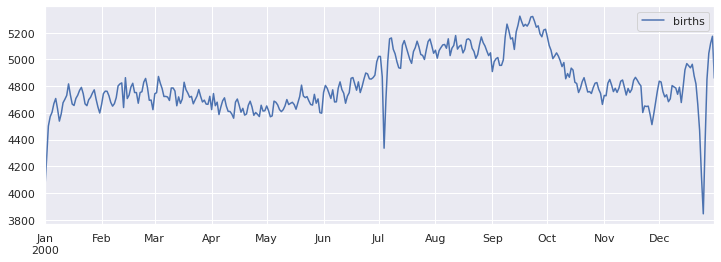

In [23]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
plt.show()